# Advanced Regression Assignment


### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Business Goal

Model is required which should be able to predict the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Step 1 Data Understanding and Preparation

In [506]:
# Exporting Data from CSV to Pandas DF

housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [507]:
housing_data.shape

(1460, 81)

In [508]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [509]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [510]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking the Nulls in the Dataset

In [511]:
# Checking remaining columns to check how many rows are null
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Taking 10% as Threshold to drop the columns with Null Values

In [512]:
round(housing_data.isnull().sum()/len(housing_data.index),2)[round(housing_data.isnull().sum()/
                                                                 len(housing_data.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [513]:
housing_data = housing_data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

#### Now there are some Year Columns which need to be convertd into simple numbers by substracting the max year value of the corresponding column



In [514]:
housing_data['YearBuilt_Old'] = housing_data.YearBuilt.max()-housing_data.YearBuilt
housing_data['YearRemodAdd_Old'] = housing_data.YearRemodAdd.max()-housing_data.YearRemodAdd
housing_data['GarageYrBlt_Old'] = housing_data.GarageYrBlt.max()-housing_data.GarageYrBlt
housing_data['YrSold_Old'] = housing_data.YrSold.max()-housing_data.YrSold
housing_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1350,1969,1969,1969.0,2009,41,41,41.0,1
501,2005,2005,2005.0,2008,5,5,5.0,2
1259,1969,1969,1969.0,2008,41,41,41.0,2
397,1962,1962,1962.0,2007,48,48,48.0,3
1169,1995,1996,1995.0,2006,15,14,15.0,4
1395,2005,2006,2005.0,2007,5,4,5.0,3
1262,1957,1989,1957.0,2009,53,21,53.0,1
580,1960,1987,1960.0,2007,50,23,50.0,3
1417,1998,1998,1998.0,2009,12,12,12.0,1
848,1908,1997,1908.0,2008,102,13,102.0,2


#### Dropping the actual Year columns


In [515]:
housing_data = housing_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Inserting sample values in the Columns having null values

In [516]:
housing_data.MasVnrType.fillna('None',inplace=True)
housing_data.MasVnrArea.fillna(housing_data.MasVnrArea.mean(),inplace=True)
housing_data.BsmtQual.fillna('TA',inplace=True)
housing_data.BsmtCond.fillna('TA',inplace=True)
housing_data.BsmtExposure.fillna('No',inplace=True)
housing_data.BsmtFinType1.fillna('Unf',inplace=True)
housing_data.BsmtFinType2.fillna('Unf',inplace=True)
housing_data.GarageType.fillna('Attchd',inplace=True)
housing_data.GarageYrBlt_Old.fillna(-1,inplace=True)
housing_data.GarageFinish.fillna('Unf',inplace=True)
housing_data.GarageQual.fillna('TA',inplace=True)
housing_data.GarageCond.fillna('TA',inplace=True)

#### Removing some more columns which doesn't seem useful based on the bias

In [517]:
housing_data.Street.value_counts()



Pave    1454
Grvl       6
Name: Street, dtype: int64

In [518]:
housing_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [519]:
housing_data = housing_data.drop(['Street','Utilities'],axis='columns')
housing_data = housing_data.drop('Id',axis='columns')

In [452]:
housing_data.shape

(1460, 71)

In [520]:
housing_data.dtypes[housing_data.dtypes !='object'].index

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old',
       'YrSold_Old'],
      dtype='object')

In [521]:
num_col = list(housing_data.dtypes[housing_data.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_data = drop_outliers(housing_data)

In [522]:
housing_data.shape

(1441, 71)

#### Taking out the Categorical Columns and then converting them into numbers to perform Linear Regression

In [523]:
housing_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [524]:
housing_data['LandSlope'] = housing_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing_data['ExterQual'] = housing_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['BsmtQual'] = housing_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtCond'] = housing_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtExposure'] = housing_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_data['BsmtFinType1'] = housing_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtFinType2'] = housing_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['HeatingQC'] = housing_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['CentralAir'] = housing_data.CentralAir.map({'N':0,'Y':1})
housing_data['KitchenQual'] = housing_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['GarageFinish'] = housing_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing_data['GarageQual'] = housing_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['GarageCond'] = housing_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterCond'] = housing_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['LotShape'] = housing_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Converting Dummy Variables of the Categorical Values

In [525]:
dummy_col = pd.get_dummies(housing_data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

#### Concatinating with the parent dataset and then dropping the variables

In [526]:

housing_data = pd.concat([housing_data,dummy_col],axis='columns')

housing_data = housing_data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Let us check the distribution of our target variable before scaling and Splitting

### Step 2 - Model Building
Creating train and test dataset

In [527]:
df_train,df_test = train_test_split(housing_data,train_size=0.7,test_size=0.3,random_state=42)

#### Performing Scaling as the values of dependent variables are on different scales

In [528]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Checking the Distribution after performing scaling

<Axes: xlabel='SalePrice', ylabel='Density'>

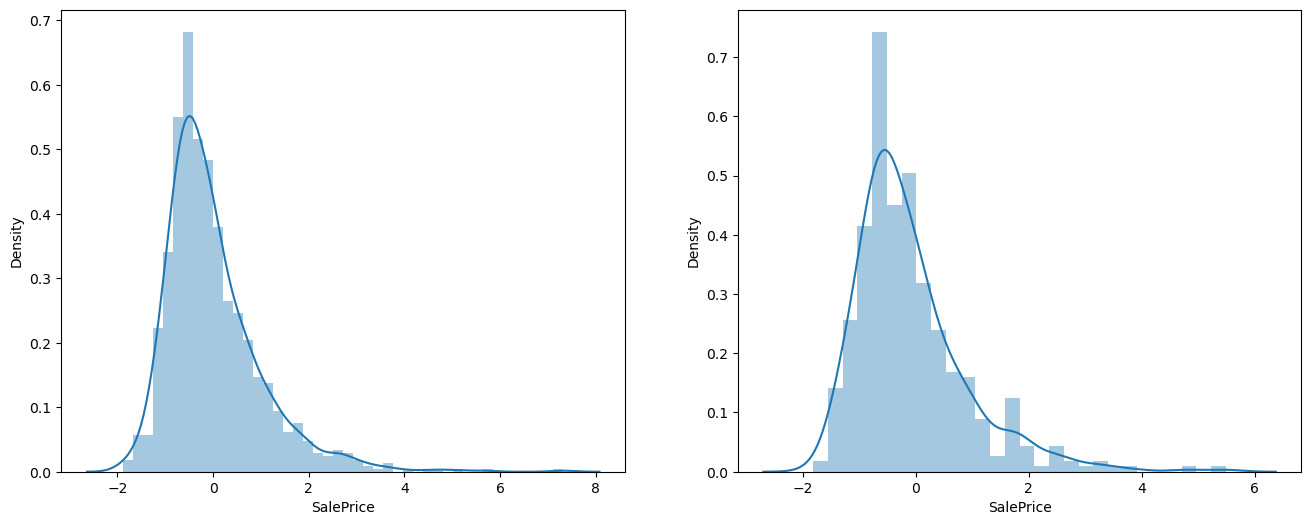

In [529]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [530]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [531]:
y_test = df_test.pop('SalePrice')
X_test = df_test

### Step 3 Implementing RFE

In [532]:
len(X_train.columns)

192

In [533]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [534]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [535]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [536]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Step 4 Lasso regression model

In [537]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9097078728709844
0.8638244907727406


In [538]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.223),
 ('OverallQual', -0.096),
 ('OverallCond', 0.182),
 ('MasVnrArea', 0.063),
 ('ExterQual', 0.099),
 ('BsmtExposure', 0.13),
 ('BsmtFinSF1', 0.083),
 ('BsmtFinSF2', 0.133),
 ('BsmtUnfSF', 0.035),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', 0.068),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.057),
 ('GrLivArea', -0.011),
 ('KitchenQual', 0.308),
 ('GarageArea', 0.096),
 ('MSZoning_FV', 0.096),
 ('MSZoning_RH', 0.001),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.091),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', 0.038),
 ('LotConfig_CulDSac', -0.052),
 ('LotConfig_FR3', 0.18),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 0.048),
 ('Neighborhood_Crawfor', 0.084),
 ('Neighborhood_NAmes', 0.263),
 ('Neighborhood_NPkVill', -0.07),
 ('Neighborhood_NoRidge', 0.036),
 ('Neighborhood_NridgHt', 0.277),
 ('Neighborhood_OldTown', 0.503),
 ('Neighborhood_Somerst', -0.079),
 ('Neighborhood_StoneBr', 0.134),
 ('Condition1_Norm', 0.343),
 ('Co

#### Implementing the model with the optimal value of alpha using GridSearchCV

In [539]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [540]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.079682,0.014741,0.003126,0.006252,0.001,{'alpha': 0.001},0.857240,0.923980,0.836396,0.889081,...,0.916091,0.911227,0.908273,0.910511,0.908124,0.921523,0.910185,0.907964,0.911435,0.004192
1,0.024998,0.007653,0.006250,0.007655,0.010,{'alpha': 0.01},0.824830,0.888049,0.843394,0.852081,...,0.862786,0.859076,0.857394,0.857775,0.856165,0.888525,0.860104,0.855096,0.861799,0.009266
2,0.014061,0.004687,0.006251,0.007656,0.100,{'alpha': 0.1},0.740455,0.821663,0.774658,0.758796,...,0.791976,0.799241,0.795167,0.795940,0.788653,0.827001,0.795370,0.791412,0.797808,0.010295
3,0.018748,0.006250,0.012499,0.006249,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.014061,0.004687,0.009374,0.007654,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [541]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [542]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9097078728709844
0.8638244907727406


In [543]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [544]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
59,Exterior1st_AsphShn,1.492100
32,Neighborhood_OldTown,0.502796
35,Condition1_Norm,0.342942
14,KitchenQual,0.307731
31,Neighborhood_NridgHt,0.276804
93,SaleType_Oth,0.267020
28,Neighborhood_NAmes,0.263024
2,OverallCond,0.181749
23,LotConfig_FR3,0.179889
61,Exterior1st_CBlock,0.179386


 ### Step 5 Ridge regression model

In [545]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9166640297504107
0.8505205657506101


#### Using GridSearchCV

In [546]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [547]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.012502,0.006251,0.007811,0.007811,0.001,{'alpha': 0.001},0.841011,0.921944,0.790533,0.890440,...,0.924305,0.918650,0.915596,0.917066,0.915387,0.928205,0.917256,0.915346,0.918676,0.004158
1,0.007813,0.007813,0.009372,0.007653,0.010,{'alpha': 0.01},0.841931,0.921901,0.793586,0.890413,...,0.924299,0.918648,0.915594,0.917064,0.915385,0.928204,0.917254,0.915344,0.918674,0.004158
2,0.009373,0.007653,0.004686,0.007158,0.100,{'alpha': 0.1},0.848851,0.921518,0.817761,0.890152,...,0.923868,0.918526,0.915459,0.916917,0.915237,0.928152,0.917102,0.915220,0.918516,0.004137
3,0.012499,0.006249,0.006248,0.007653,0.200,{'alpha': 0.2},0.853654,0.921148,0.835741,0.889882,...,0.923018,0.918261,0.915172,0.916644,0.914930,0.928039,0.916781,0.914952,0.918190,0.004108
4,0.006249,0.007654,0.006249,0.007654,0.500,{'alpha': 0.5},0.860870,0.920115,0.864169,0.889169,...,0.920101,0.917187,0.914032,0.915628,0.913740,0.927556,0.915522,0.913866,0.916941,0.004093


In [548]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [549]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9166640297504107
0.8505205657506101


In [550]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [551]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
59,Exterior1st_AsphShn,1.833175
93,SaleType_Oth,0.653070
54,RoofMatl_Metal,0.596658
32,Neighborhood_OldTown,0.571780
94,SaleType_WD,0.513177
35,Condition1_Norm,0.501407
53,RoofMatl_Membran,0.454376
89,GarageType_Detchd,0.405739
19,MSZoning_RM,0.357993
17,MSZoning_RH,0.348457


### Values of Both Ridge and Laso model is same but we will prefer Laso as it helps to eliminate the variables

In [552]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9097078728709844
0.8638244907727406


#### Best alpha value for Lasso : 0.001
#### Best alpha value for Ridge : 1.0

#### Double value of Ridge and Laso and calculate the Result

In [553]:
ridge = Ridge(alpha = 2.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9101405779797546
0.8635841080500744


In [554]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9032565675285363
0.8670434634098516


In [555]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [556]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
59,Exterior1st_AsphShn,1.179039
32,Neighborhood_OldTown,0.453413
14,KitchenQual,0.315042
35,Condition1_Norm,0.251603
31,Neighborhood_NridgHt,0.239311
28,Neighborhood_NAmes,0.215511
93,SaleType_Oth,0.210375
2,OverallCond,0.193734
61,Exterior1st_CBlock,0.174397
23,LotConfig_FR3,0.165499


In [557]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [558]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
59,Exterior1st_AsphShn,1.150270
32,Neighborhood_OldTown,0.522838
35,Condition1_Norm,0.393928
39,Condition2_PosN,0.370826
31,Neighborhood_NridgHt,0.303694
93,SaleType_Oth,0.284536
28,Neighborhood_NAmes,0.280451
26,Neighborhood_BrkSide,0.217308
14,KitchenQual,0.210515
12,LowQualFinSF,0.188145


### With alpha values doubled for Ridge and Laso there was slight increase in the Coefficient Values and R2 Values decreased slightly

### Dropping Top 5 Feature and then calculating the Scores

In [559]:

X_train = X_train.drop(['Exterior1st_AsphShn','Neighborhood_OldTown','Condition1_Norm','Condition2_PosN','Neighborhood_NridgHt'], axis=1)
X_test = X_test.drop(['Exterior1st_AsphShn','Neighborhood_OldTown','Condition1_Norm','Condition2_PosN','Neighborhood_NridgHt'], axis=1)


In [560]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [561]:
model_cv.best_params_

{'alpha': 0.001}

In [562]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8898863939383326
0.8520494771012731


In [563]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [564]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
55,Exterior1st_BrkFace,1.430825
36,Condition2_RRAn,0.696024
88,SaleType_Oth,0.285501
28,Neighborhood_NAmes,0.280521
35,Condition2_Norm,0.272727
14,KitchenQual,0.265680
31,Neighborhood_Somerst,0.235295
33,Condition1_RRAn,0.211040
2,OverallCond,0.201136
56,Exterior1st_CBlock,0.174448
